In [1]:
%matplotlib inline

# Pyinterpolate functions
from pyinterpolate.kriging.helper_functions.read_data import read_data
from pyinterpolate.kriging.semivariance import calculate_semivariance
from pyinterpolate.kriging.fit_semivariance import TheoreticalSemivariogram
from pyinterpolate.kriging.kriging import Krige

# Additional libraries for data handling
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Digital Elevation Model points

dem_points = read_data('data/gorzow_dem_01p.dat', sep=',')

In [3]:
# Show first 10 records
# First column: x
# Second column: y
# Third column: value (DEM in meters)

for record in dem_points[:10,:]:
    print(record)

[15.1152409  52.76514556 91.27559662]
[15.1152409  52.74279035 96.54829407]
[15.1152409  52.71070647 51.25455093]
[15.1152409  52.70884354 48.95828247]
[15.1152409  52.67137785 16.81786346]
[15.1152409  52.6498506  16.29390526]
[15.1152409  52.62770238 16.54066277]
[15.1152409  52.60596814 19.45093346]
[15.1152409  52.60493317 19.24267578]
[15.1152409  52.57823111 45.66201019]


In [4]:
# To calculate semivariance we must first set a group of values
# hh - step size in the point's units for which we will increase radius
# of comparison area
# lags - numpy array with increasing distance of search from each point

hh = 0.03
lags = np.arange(0, 0.3, hh)
gamma = calculate_semivariance(dem_points, lags, hh)

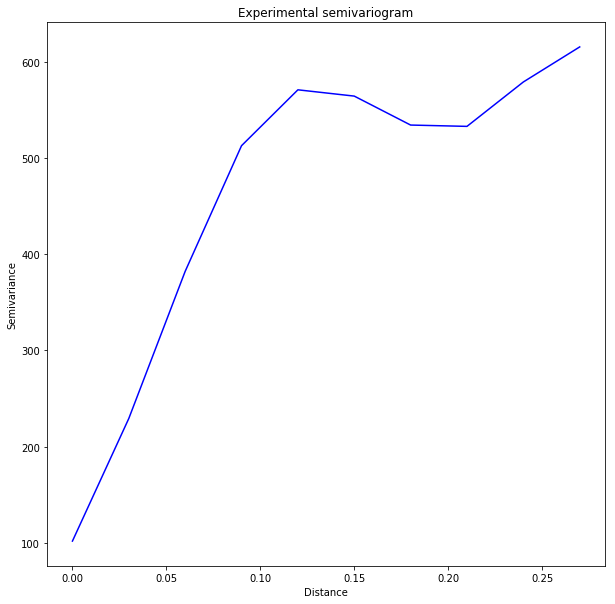

In [5]:
# Prepare semivariogram data

semivariogram = TheoreticalSemivariogram(dem_points, gamma)
semivariogram.show_experimental_semivariogram()

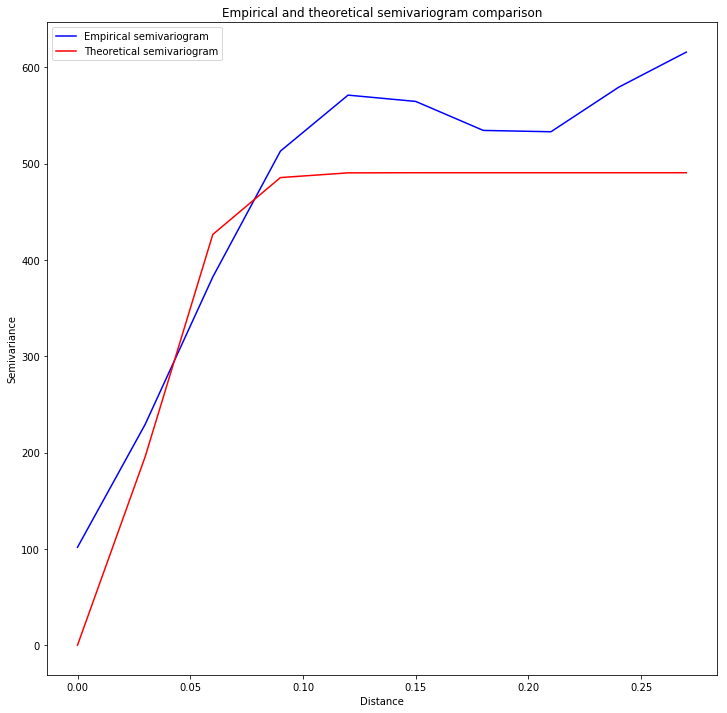

In [6]:
# Fit theoretical semivariogram to the given values

semivariogram.fit_semivariance('gaussian')
semivariogram.show_semivariogram()

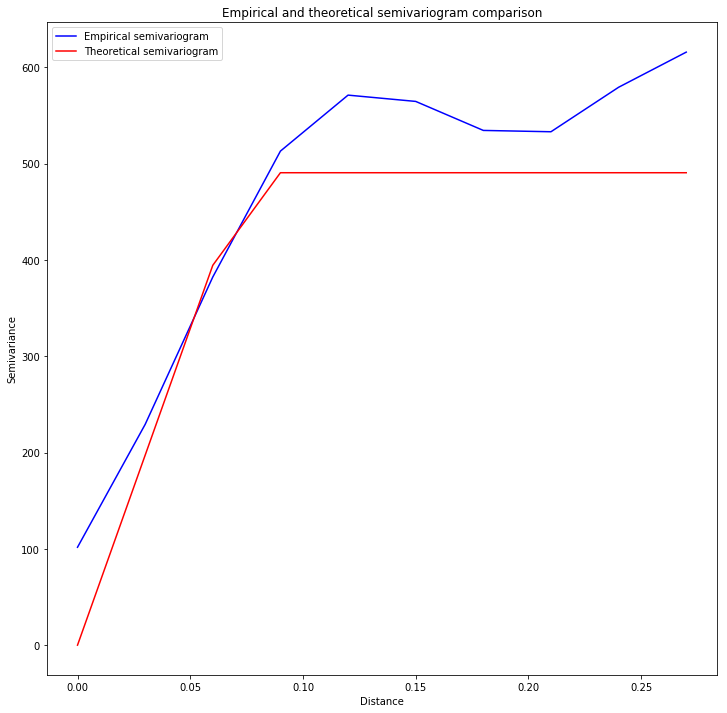

In [7]:
semivariogram.fit_semivariance('linear')
semivariogram.show_semivariogram()

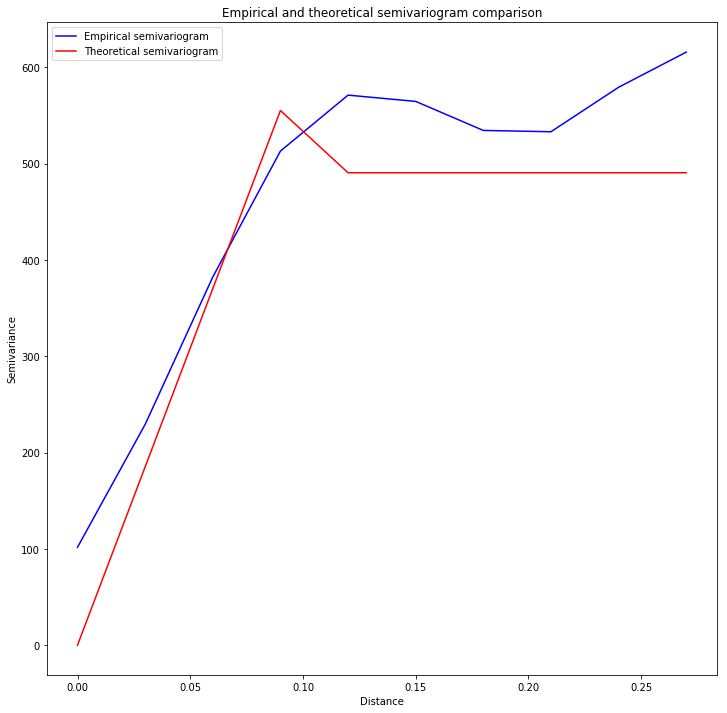

In [8]:
semivariogram.fit_semivariance('spherical')
semivariogram.show_semivariogram()

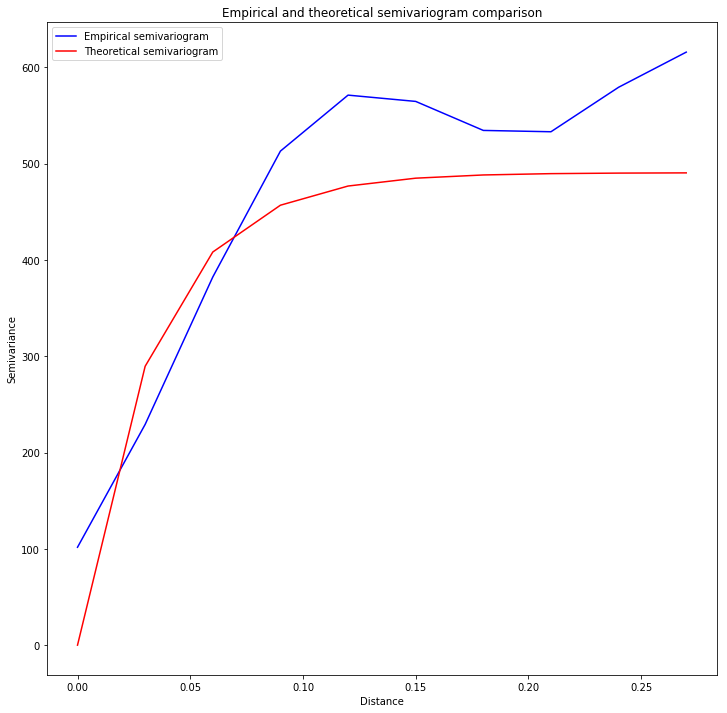

In [9]:
semivariogram.fit_semivariance('exponential')
semivariogram.show_semivariogram()

In [10]:
# Kriging -> the first way to perform Kriging (fast checking of values)

semivariogram.fit_semivariance('spherical')
model = Krige(dem_points, semivariogram)
model.interpolate_raster(scale_factor=0.004,
                         kriging_type='simple',
                         number_of_neighbours=8,
                         update_model=True)

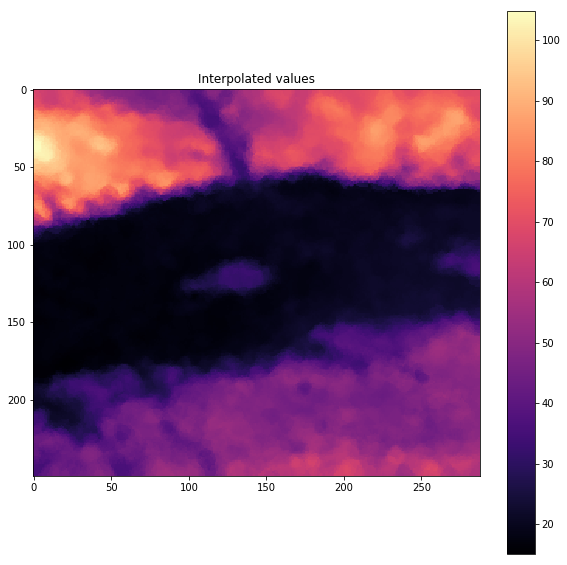

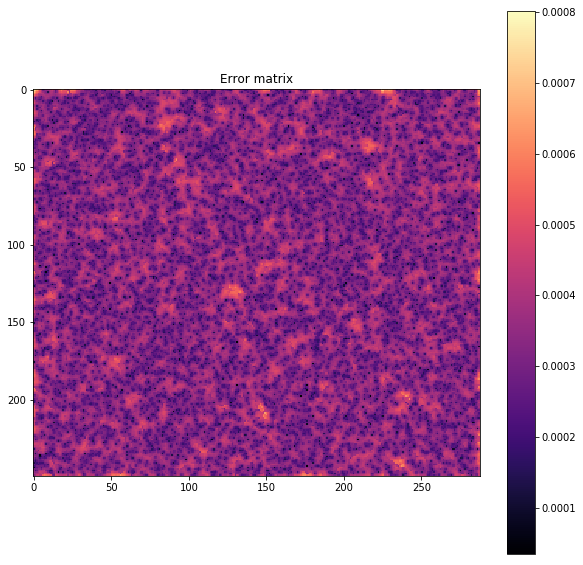

In [11]:
model.show_results()
model.show_error_matrix()

In [13]:
# You can predict also single-point values

model.prepare_data(unknown_position=[15.12, 53],
                   number_of_records=8)
s = model.simple_kriging()
print('Predicted value is:', s[0])

Predicted value is: 57.4020009224994
